This notebook dedicated to different API techniques to deploy ML model
- Restful
- Fast
- GCP
- Heroku

# ML model

In [30]:
!pip install lazypredict==0.2.8

In [31]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from joblib import dump, load
from lazypredict.Supervised import LazyRegressor as lp
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
# load data into pandas
data = load_boston()
input_feature_name = data.feature_names

# add input feature
df = pd.DataFrame(data=data.data, columns=input_feature_name)

# add target
df['target'] = data.target

In [33]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [34]:
# check if null values are present
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [35]:
# lets check the statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


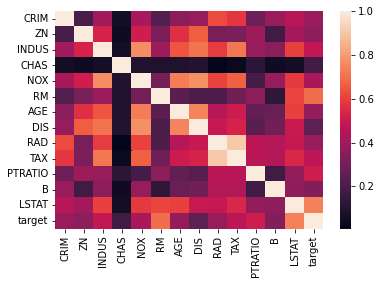

In [36]:
sns.heatmap(df.corr().abs());

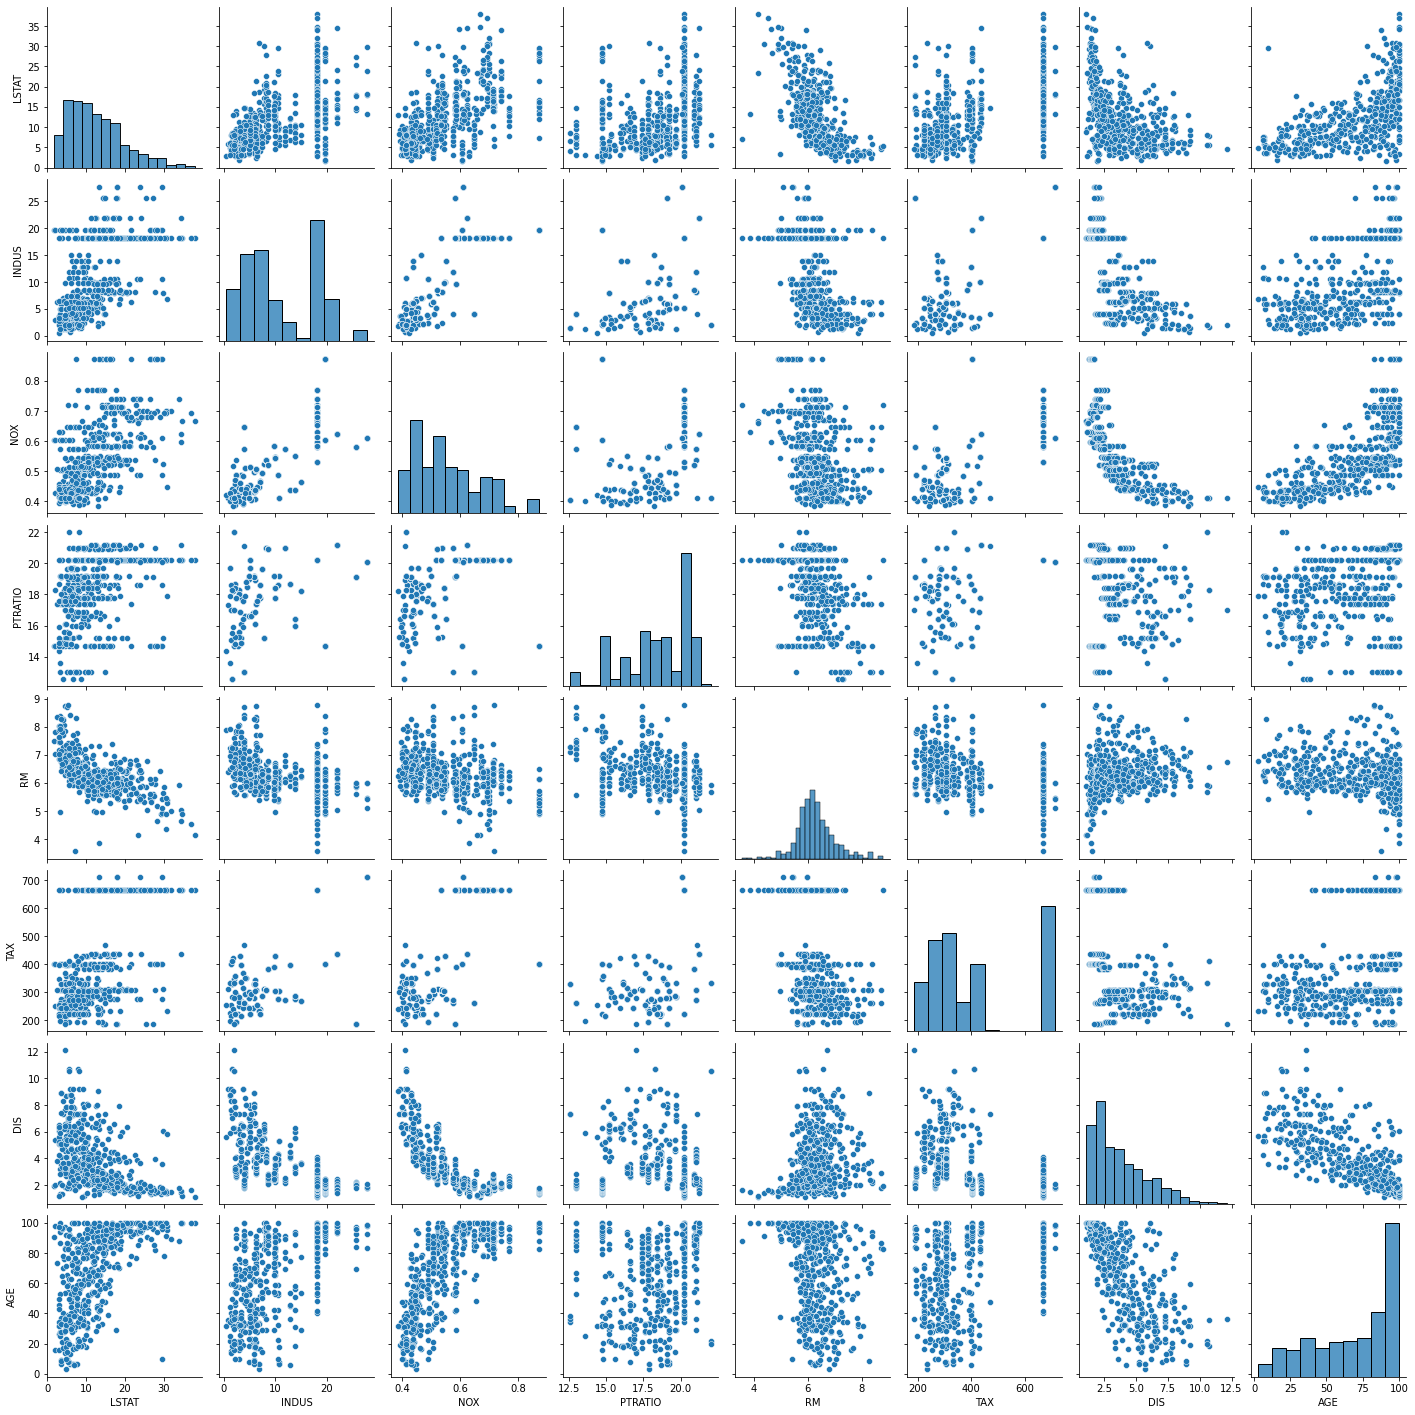

In [37]:
# pairplot for distribution
sns.pairplot(df[['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']] , palette='Set1');

In [38]:
# new dataset
data_boston = df[['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE', 'target']]
data_boston.head(n=7)

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE,target
0,4.98,2.31,0.54,15.30,6.58,296.00,4.09,65.20,24.00
1,9.14,7.07,0.47,17.80,6.42,242.00,4.97,78.90,21.60
2,4.03,7.07,0.47,17.80,7.18,242.00,4.97,61.10,34.70
3,2.94,2.18,0.46,18.70,7.00,222.00,6.06,45.80,33.40
4,5.33,2.18,0.46,18.70,7.15,222.00,6.06,54.20,36.20
5,5.21,2.18,0.46,18.70,6.43,222.00,6.06,58.70,28.70
6,12.43,7.87,0.52,15.20,6.01,311.00,5.56,66.60,22.90


In [39]:
# split data
X_train, X_test, y_train, y_test = train_test_split(data_boston.iloc[:,:-1], data_boston['target'], test_size=0.2, random_state=0)

In [40]:
# transform object
transform = PowerTransformer(method='yeo-johnson', standardize=True)
X_train_transform = transform.fit_transform(X_train)
X_test_transform = transform.transform(X_test)

In [41]:
# check best models
reg = lp(verbose=0,ignore_warnings=True, custom_metric=None)

# run test
models,predictions = reg.fit(X_train_transform, X_test_transform, y_train, y_test)

100%|██████████| 42/42 [00:03<00:00, 12.08it/s]


In [42]:
boston_models = models
# reset index
boston_models.reset_index(inplace=True)
boston_models

,Model,Adjusted R-Squared,R-Squared,RMSE,Time Taken
0,GradientBoostingRegressor,0.76,0.78,4.20,0.16
1,RandomForestRegressor,0.70,0.72,4.74,0.29
2,BaggingRegressor,0.69,0.72,4.79,0.05
3,XGBRegressor,0.68,0.71,4.86,0.18
4,ExtraTreesRegressor,0.66,0.69,5.04,0.19
5,LGBMRegressor,0.66,0.69,5.05,0.07
6,AdaBoostRegressor,0.66,0.69,5.05,0.14
7,HistGradientBoostingRegressor,0.66,0.68,5.09,0.23
8,ExtraTreeRegressor,0.59,0.62,5.58,0.02
9,PoissonRegressor,0.58,0.61,5.61,0.02


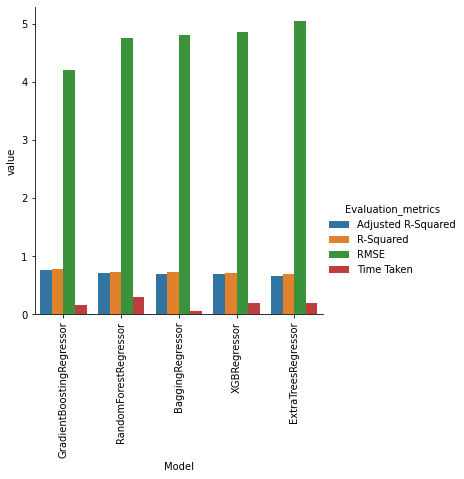

In [43]:
# melt columns
boston_melted = pd.melt(boston_models[:5], id_vars="Model", var_name="Evaluation_metrics", value_name="value")
# plot
g = sns.factorplot(x='Model', y='value', hue='Evaluation_metrics', data=boston_melted, kind='bar');
g.set_xticklabels(rotation=90);

In [ ]:
# Lets go with random forest
# Hyper parameter tuning with randomsearchcv
# create a small version of parameter grid defined in Domain and name it as search space - Taking best parameter with little variation in number of leaves and number of estimators
search_space = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [25]:
# use repeatedfold from sklearn library
model = RandomForestRegressor()
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=0)

# train model
# note: RandomizedSearchCV is maximizing the scoring, hence it is used neg_rmse
# Here i Will use 60 itration for Random search 
# Remeber search space with n_estimators=19 and n_leaves=10
# Grid search tries all 190 combinations --> computation intensive
# To test Random search I will run for 60 iteration and then 100 iteration and see how close we get to the best parameters
RandomizedSearchCV_results = RandomizedSearchCV(model, search_space, n_iter=60, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv).fit(X_train_transform,y_train)

In [ ]:
# Best parameter
RandomizedSearchCV_results.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [44]:
# Create new model
rf_model = RandomForestRegressor(bootstrap= False, max_depth= 60, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators=1200)
r_squared = cross_val_score(rf_model, X_train_transform, y_train, scoring='r2', cv = cv)
print(r_squared)
print(r_squared.mean())
print(r_squared.std())

[0.87758409 0.92051807 0.88236806 0.86862307 0.92530686 0.88312461
 0.91058166 0.91482693 0.89322169]
0.8973505604494536
0.019603446236616844


In [45]:
# fit model
rf_model.fit(X_train_transform, y_train)

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                      n_estimators=1200)

In [46]:
# final step create a pipeline
pipe = Pipeline([('transformer', PowerTransformer(method='yeo-johnson', standardize=True)), ('randomforest', RandomForestRegressor(bootstrap= False, max_depth= 60, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators=1200))])

In [47]:
# fit pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer', PowerTransformer()),
                ('randomforest',
                 RandomForestRegressor(bootstrap=False, max_depth=60,
                                       max_features='sqrt',
                                       n_estimators=1200))])

In [48]:
#run on test data pipeline
y_pred_pipe = pipe.predict(X_test)

In [49]:
# test on normal model
y_pred_model = rf_model.predict(X_test_transform) 

In [50]:
# compare the results
print("r-squared error : " + str(r2_score(y_test,y_pred_pipe)))
print("mean squared error : " + str(mean_squared_error(y_test,y_pred_pipe)))
print("root mean squared error : "+ str(np.sqrt(mean_squared_error(y_test,y_pred_pipe))))


r-squared error : 0.6923407607469244
mean squared error : 25.052211615349353
root mean squared error : 5.00521843832508


In [54]:
import pickle
pickle.dump(rf_model, open("model.pkl", "wb"))

In [52]:
# compare the results
print("r-squared error : " + str(r2_score(y_test,y_pred_model)))
print("mean squared error : " + str(mean_squared_error(y_test,y_pred_model)))
print("root mean squared error : "+ str(np.sqrt(mean_squared_error(y_test,y_pred_model))))

r-squared error : 0.6968766455780755
mean squared error : 24.682861593784175
root mean squared error : 4.96818493957141


In [53]:
# save model
dump(pipe, 'boston_model.joblib') 

['boston_model.joblib']

In [55]:
import joblib
model_load = joblib.load('boston_model.joblib')

In [56]:
body = [{ "LSTAT": 2, "INDUS": 2, "NOX": 0.5, "PTRATIO": 3, "RM": 2, "TAX": 2, "DIS": 0.5, "AGE": 3}]
json_ = body
query_df = pd.DataFrame(json_)
query = pd.get_dummies(query_df)

In [57]:
model_load.predict(query_df)[0]

34.40941666666663

In [16]:
!pip freeze > requirements.txt